# PyLadies: Crane Dataset Demo 🦢
*Date: 2025-09-29*  
*Presenter: Jennifer Slotnick*

For this lightning talk I’ll demonstrate simple plotting in Python using the **TidyTuesday dataset of the prior week**.

TidyTuesday is organized by the **Data Science Learning Community**. All are welcome to participate, and you’re encouraged to share the code you used to generate your results!  

📂 TidyTuesday GitHub: [rfordatascience/tidytuesday](https://github.com/rfordatascience/tidytuesday)

TidyTuesday datasets are great for practicing data skills — each week includes a short article, dataset, and data dictionary.  

⚠️ **Note:** TidyTuesday is for *practice only*. These datasets are incomplete snapshots, so we should not infer causation.  We can just practice tidying and plotting!


## 0.Setup

If running in a fresh environment, install required libraries:  
(Uncomment the line below if needed)

In [2]:
# !pip install pandas matplotlib scikit-learn

## 🔑 Mini Cheatsheet (pandas + matplotlib)

### pandas
- `df.head()` → preview first rows  
- `df.info()` → data types & non-null counts  
- `df.groupby("col")["value"].mean()` → group & summarize  
- `df["col"].dt.year` → extract year from datetime  

### matplotlib
- `plt.plot(x, y, marker="o")` → simple line chart  
- `plt.xlabel("...")` / `plt.ylabel("...")` → axis labels  
- `plt.title("...")` → add a title  
- `plt.show()` → display the plot


## 1. Load the Data
The TidyTuesday team provides the article, dataset, and data dictionary on GitHub.  

Note: TidyTuesday started as an R project, so their cleaning script is in R, but you can use Python to explore the data too.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# import pydytuesday   # optional

# Option A: download all weekly files with pydytuesday
# pydytuesday.get_date('2025-09-30')

# Option B: simplest – read the CSV directly from GitHub
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-30/cranes.csv"
cranes = pd.read_csv(url)

# First look at the data
cranes.head()

,date,observations,comment,weather_disruption
0,2024-10-03,408.0,Last count of season,False
1,2024-09-30,14940.0,NaN,False
2,2024-09-26,NaN,Canceled/No count,True
3,2024-09-23,18450.0,NaN,False
4,2024-09-19,14900.0,NaN,False


## 2. Guiding Question of the Week

Has the crane population at Lake Hornborgasjön grown over the past 30 years?

## 3. Outline your Plan
From this prompt, I want to look at crane data over the year so I started manipulating the date_column and split that data out to play with. My plan is to plot the average crane population per year for the past 30 years. To do that I will look at the yearly mean to plot per year.

In [9]:
#Convert column date to datetime, create day_of_the_year
cranes['date_column'] = pd.to_datetime(cranes['date'])

#pieces of date
cranes['day'] = cranes['date_column'].dt.day
cranes['month'] = cranes['date_column'].dt.month
cranes['year'] = cranes['date_column'].dt.year
cranes['day_of_year'] = cranes['date_column'].dt.dayofyear

cranes[['date_column','day','month','year','day_of_year']].head()

,date_column,day,month,year,day_of_year
0,2024-10-03,3,10,2024,277
1,2024-09-30,30,9,2024,274
2,2024-09-26,26,9,2024,270
3,2024-09-23,23,9,2024,267
4,2024-09-19,19,9,2024,263


After I have all the dates broken down I can look at the yearly average

In [6]:
yearly_avg = cranes.groupby('year')['observations'].mean().reset_index()

print(yearly_avg.head())

   year  observations
0  1994   2749.714286
1  1995   2274.378378
2  1996   2313.814815
3  1997   3340.676471
4  1998   4602.777778


Ok, ready to do a simple plot! Heres some documentaiton on plotting using matplotlib: https://matplotlib.org/stable/tutorials/pyplot.html 

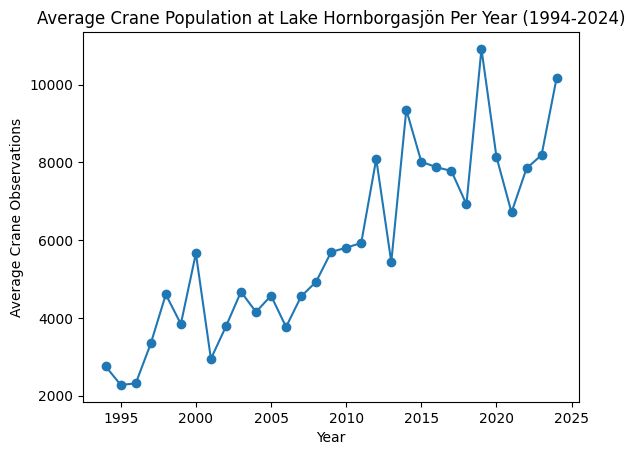

In [7]:
#plot a simple line graph of crane observations per year
plt.plot(yearly_avg["year"], yearly_avg["observations"], marker="o")
plt.xlabel('Year')
plt.ylabel('Average Crane Observations')
plt.title('Average Crane Population at Lake Hornborgasjön Per Year (1994-2024)')
plt.show()

## 4. Reflection & Call to Action!

✅ We cleaned the data, created date features, and plotted average crane observations per year.  
📊 This gave us a sense of long-term trends, but it also sparks more questions!

### Your Turn: Explore Further
One of the TidyTuesday prompts is:  
**“If you wanted to see thousands of cranes, when is the best time of year to visit?”**

To get started, try grouping by **month** instead of year below


In [ ]:
#Group by Month YOUR CODE BELOW

## 5. Share Your Work ✨

TidyTuesday is all about **learning in public** and connecting with others.  
If you try one of the practice prompts or make your own plot, consider sharing it!

### How to Share
- 📸 Post your visualization on **Twitter/X, Mastodon, or LinkedIn** with the hashtag **#TidyTuesday**  
- 📂 Include your code (GitHub, Gist, Colab, or Kaggle Notebook are all fine)  
- 💬 Join the conversation in the [TidyTuesday GitHub Discussions](https://github.com/rfordatascience/tidytuesday/discussions)  

### Why Share?
- Practice explaining your work to others  
- Get feedback, encouragement, and new ideas  
- Become part of a global data science learning community  

**All are welcome** — the emphasis is on practice and learning, not perfection!!  
